In [85]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

sns.set(style="whitegrid")

In [87]:
#  1: Data Generation and Loading

np.random.seed(42)
num_samples = 10000

#size = np.random.normal(loc=1500, scale=400, size=num_samples).astype(int)
#bedrooms = np.random.choice([2, 3, 4, 5], size=num_samples, p=[0.2, 0.5, 0.2, 0.1])
#bathrooms = np.random.choice([1, 2, 3], size=num_samples, p=[0.3, 0.5, 0.2])
#garage = np.random.choice([0, 1], size=num_samples, p=[0.3, 0.7])
#location_score = np.random.randint(1, 11, size=num_samples)

# Features
size = np.random.randint(500, 3000, size=num_samples)
bedrooms = np.random.randint(1, 6, size=num_samples)
bathrooms = np.random.randint(1, 4, size=num_samples)
location_score = np.random.randint(1, 11, size=num_samples)


# Generate price with noise
base_price = 50000 + (size * 100) + (bedrooms * 20000) + (bathrooms * 15000)
price = base_price + np.random.normal(0, 20000, size=num_samples)

df = pd.DataFrame({
    'Size': size,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'Location': location_score,
    'Price': price
})

# Save to CSV (Optional)
df.to_csv("custom_house_prices.csv", index=False)

In [89]:
#  2: Data Exploration & Preprocessing

print("First 20 rows of dataset:")
print(df.head(20))

print("\nSummary Statistics:")
print(df.describe())
print(df.dtypes)

First 20 rows of dataset:
    Size  Bedrooms  Bathrooms  Location          Price
0   1360         5          3         5  278858.997823
1   1794         3          1         3  277625.204647
2   1630         1          2         6  271346.353167
3   1595         2          1         9  240549.891899
4   2138         3          3         9  354546.557401
5   2669         1          2         5  375978.786699
6    966         2          3         8  247678.069609
7   1738         3          3         4  349453.642041
8    830         3          2         5  234080.449961
9   1982         3          2         7  315684.857098
10  2635         4          1         7  440625.932859
11   630         5          2         7  224141.995841
12  2185         1          1         8  290776.120025
13  1269         5          2         5  306790.092223
14  2891         5          3         1  489674.582548
15  2015         5          1         9  395272.002336
16  2933         3          2         9

In [91]:
#  Define features and target
X = df.drop(columns=['Price'])  # predictors
y = df['Price']  # target

In [93]:
# Step 4: Identify categorical and numerical features
categorical_features = ['Bedrooms', 'Bathrooms', 'Location']
numerical_features = [col for col in X.columns if col not in categorical_features]

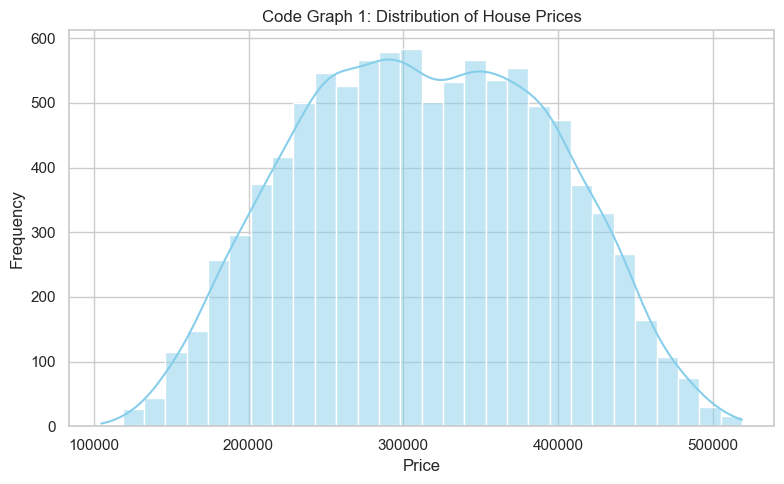

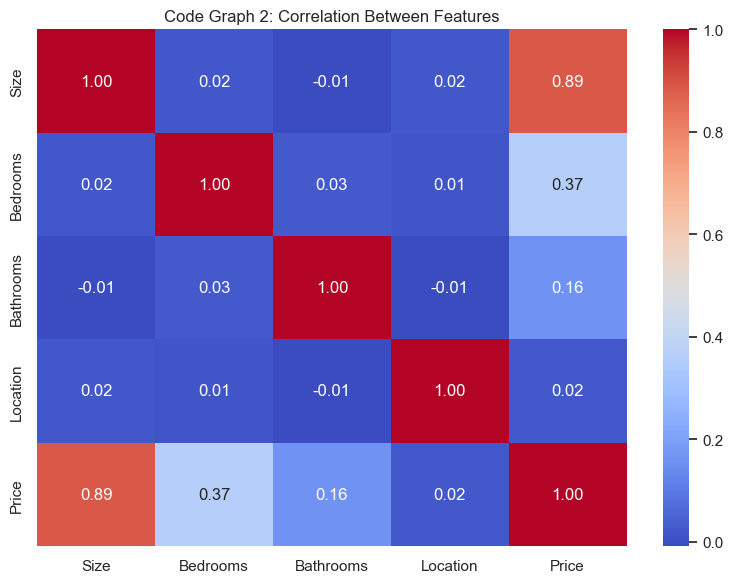


Numerical Correlation with Price:
Size         0.888526
Bedrooms     0.365513
Bathrooms    0.158089
Location     0.020315
Name: Price, dtype: float64


In [111]:
#  Plot 1: Distribution of House Prices
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title("Code Graph 1: Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#  Plot 2: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Code Graph 2: Correlation Between Features")
plt.tight_layout()
plt.show()



#  Numerical Insight:

#  Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

#  Compute correlation with 'Price'
corr = numeric_df.corr()["Price"].drop("Price")

#  Print the sorted correlations
print("\nNumerical Correlation with Price:")
print(corr.sort_values(ascending=False))


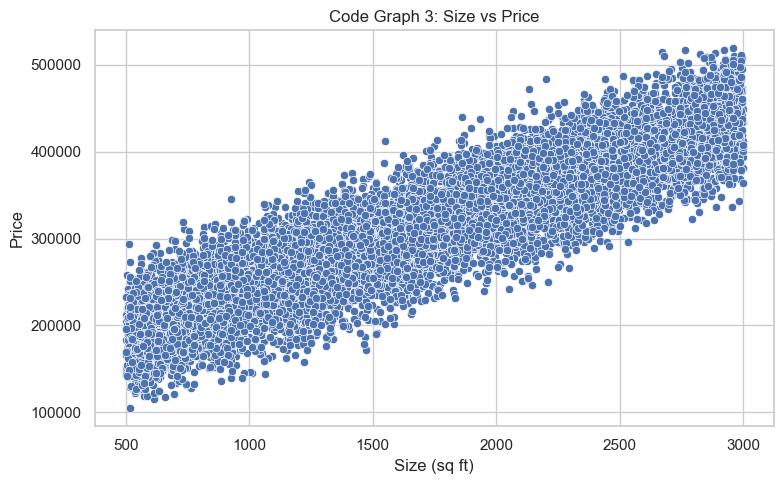

/var/folders/s6/c9rmq03n2kggx9x6d1lgkj240000gn/T/ipykernel_15459/3538060389.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Bedrooms', y='Price', data=df, ci=None)


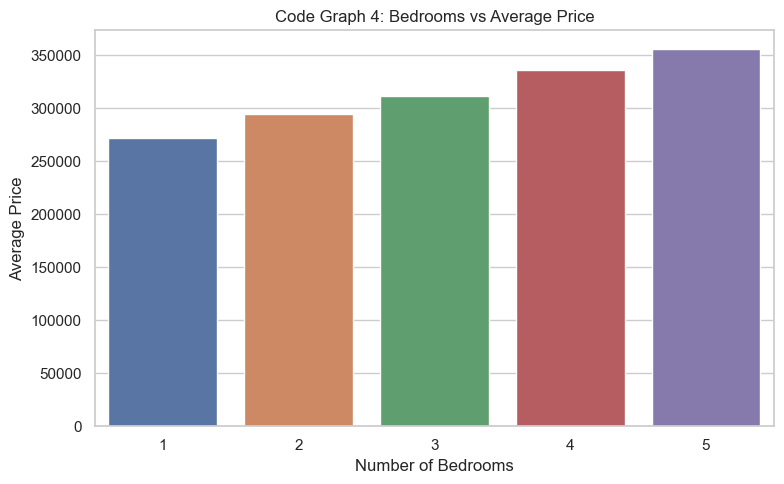


Average Price by Bedrooms:
Bedrooms
1    272079.515190
2    294488.954904
3    311014.752040
4    335560.886294
5    355627.472146
Name: Price, dtype: float64


In [97]:
# Visualisation of Key Features

#  Plot 3: Size vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Size', y='Price', data=df)
plt.title("Code Graph 3: Size vs Price")
plt.xlabel("Size (sq ft)")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

#  Plot 4: Bedrooms vs Average Price
plt.figure(figsize=(8, 5))
sns.barplot(x='Bedrooms', y='Price', data=df, ci=None)
plt.title("Code Graph 4: Bedrooms vs Average Price")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()

#  Numerical Insight:
print("\nAverage Price by Bedrooms:")
print(df.groupby("Bedrooms")["Price"].mean())

In [99]:
# Train/Test Split

X = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

print(f"\nTraining Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")


Training Samples: 6500
Testing Samples: 3500



Linear Regression Performance:
  MSE: 393229642.00
  RMSE: 19830.02
  R² Score: 0.9407

Random Forest Performance:
  MSE: 521721183.92
  RMSE: 22841.22
  R² Score: 0.9213


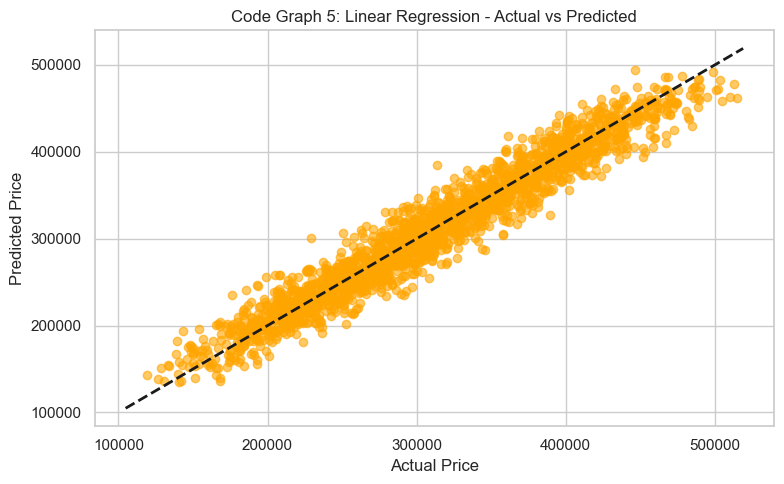

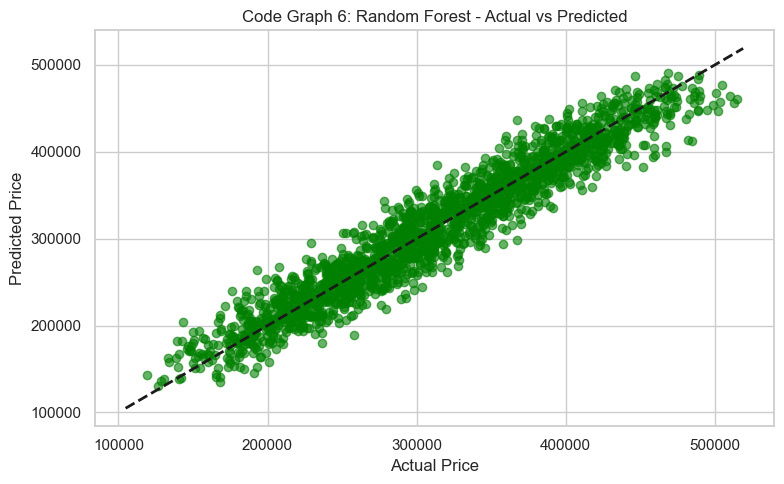

In [101]:
# Model Training & Evaluation

#  Linear Regression
lr_model = LinearRegression()
X = pd.get_dummies(df[['Size', 'Bedrooms', 'Bathrooms', 'Location']], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model.fit(X_train, y_train)


#  Linear Regression
#lr_model = LinearRegression()
#lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

#  Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

#  Evaluation Function
def evaluate_model(y_true, y_pred, name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} Performance:")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R² Score: {r2:.4f}")
    return mse, rmse, r2

lr_results = evaluate_model(y_test, lr_preds, "Linear Regression")
rf_results = evaluate_model(y_test, rf_preds, "Random Forest")

#  Plot 5: Actual vs Predicted (Linear Regression)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, lr_preds, alpha=0.6, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title("Code Graph 5: Linear Regression - Actual vs Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.tight_layout()
plt.show()

#  Plot 6: Actual vs Predicted (Random Forest)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, rf_preds, alpha=0.6, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title("Code Graph 6: Random Forest - Actual vs Predicted")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.tight_layout()
plt.show()

In [102]:
# Simple, Multiple, and Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

# -------- Simple Linear Regression (1 Feature: Size) -------- #
X_simple = df[['Size']]
y_simple = df['Price']

X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.35, random_state=42)

simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)
simple_preds = simple_model.predict(X_test_simple)

print("\nSimple Linear Regression:")
evaluate_model(y_test_simple, simple_preds, "Simple Linear Regression")

# -------- Multiple Linear Regression (All Features) -------- #
X_multi = df.drop("Price", axis=1)
y_multi = df["Price"]

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.35, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)
multi_preds = multi_model.predict(X_test_multi)

print("\nMultiple Linear Regression:")
evaluate_model(y_test_multi, multi_preds, "Multiple Linear Regression")
# -------- Polynomial Regression (Size and Size^2) -------- #
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[['Size']])

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly, y_simple, test_size=0.35, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)
poly_preds = poly_model.predict(X_test_poly)

print("\nPolynomial Regression (Size²):")
evaluate_model(y_test_poly, poly_preds, "Polynomial Regression")




Simple Linear Regression:

Simple Linear Regression Performance:
  MSE: 1377794625.64
  RMSE: 37118.66
  R² Score: 0.7886

Multiple Linear Regression:

Multiple Linear Regression Performance:
  MSE: 398864250.36
  RMSE: 19971.59
  R² Score: 0.9388

Polynomial Regression (Size²):

Polynomial Regression Performance:
  MSE: 1377818708.93
  RMSE: 37118.98
  R² Score: 0.7886


(1377818708.9304698, 37118.9804403417, 0.7885974701126895)

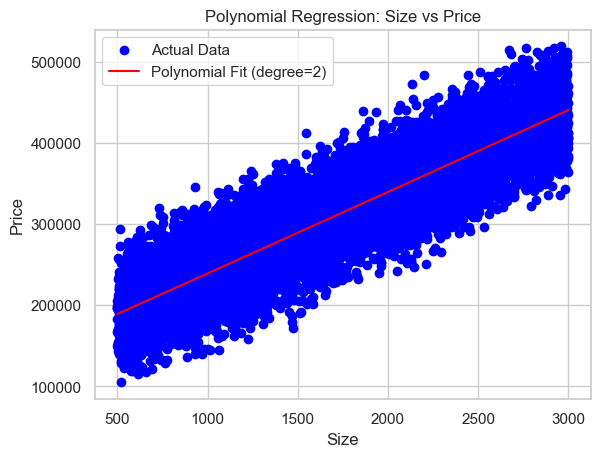

Polynomial Coefficients: [2.44714758e-04 9.97207224e+01 1.39275217e+05]
R² Score: 0.7894804275218138


In [103]:


# Step 1: Choose one feature and target
X_simple = df['Size'].values  # predictor
y_simple = df['Price'].values  # target

# Step 2: Define polynomial degree
degree = 2  # Degree 2 = quadratic curve

# Step 3: Fit the polynomial regression model using numpy.polyfit
# This returns polynomial coefficients for: y = a*x^2 + b*x + c
coeffs = np.polyfit(X_simple, y_simple, deg=degree)

# Step 4: Create polynomial function from coefficients
poly_model = np.poly1d(coeffs)

# Step 5: Predict using the model
y_pred = poly_model(X_simple)

# Step 6: Evaluate model (R²)
# Calculate R² manually
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_pred)**2)
r2 = 1 - (ss_residual / ss_total)

# Step 7: Plot the results
plt.scatter(X_simple , y_simple, color='blue', label='Actual Data')
X_line = np.linspace(X_simple.min(), X_simple.max(), 100)
Y_line = poly_model(X_line)
plt.plot(X_line, Y_line, color='red', label=f'Polynomial Fit (degree={degree})')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Polynomial Regression: Size vs Price')
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Print coefficients and R² score
print("Polynomial Coefficients:", coeffs)
print("R² Score:", r2)


Best Parameters from Grid Search (Random Forest):
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

Tuned Random Forest Performance:
  MSE: 453056056.50
  RMSE: 21285.11
  R² Score: 0.9317


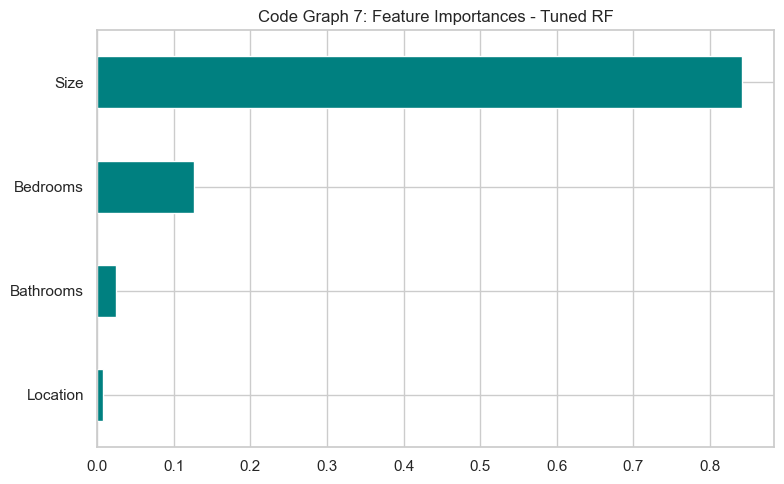

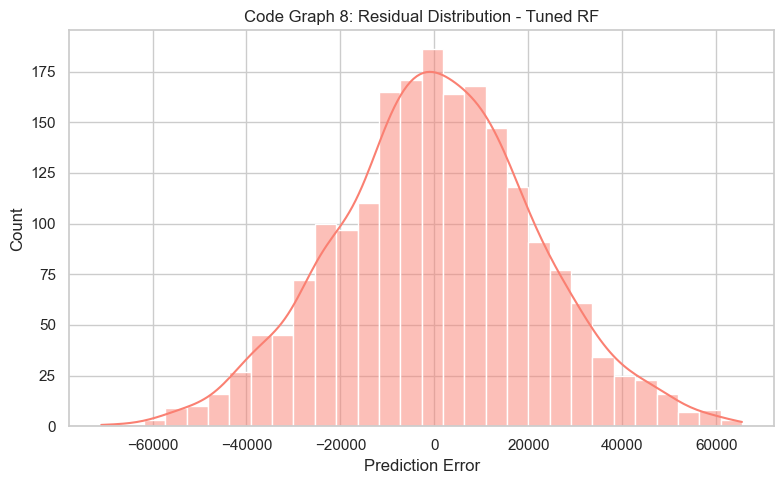


Best Parameters from Grid Search (Ridge Regression):
{'alpha': 0.01}

Tuned Ridge Regression Performance:
  MSE: 393229647.54
  RMSE: 19830.02
  R² Score: 0.9407

Best Parameters from Grid Search (Lasso Regression):
{'alpha': 10}

Tuned Lasso Regression Performance:
  MSE: 393230315.78
  RMSE: 19830.04
  R² Score: 0.9407


(393230315.78250265, 19830.035697963398, 0.9407103079261617)

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso

# Hyperparameter Tuning (GridSearch for Random Forest, Ridge, and Lasso)

# --- Random Forest Hyperparameter Tuning ---
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
best_rf_preds = best_rf.predict(X_test)

print("\nBest Parameters from Grid Search (Random Forest):")
print(grid_search_rf.best_params_)

# Evaluation
evaluate_model(y_test, best_rf_preds, "Tuned Random Forest")

# Plot 7: Feature Importance - Random Forest
plt.figure(figsize=(8, 5))
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='teal')
plt.title("Code Graph 7: Feature Importances - Tuned RF")
plt.tight_layout()
plt.show()
# Plot 8: Residual Plot - Random Forest
residuals_rf = y_test - best_rf_preds
plt.figure(figsize=(8, 5))
sns.histplot(residuals_rf, bins=30, kde=True, color='salmon')
plt.title("Code Graph 8: Residual Distribution - Tuned RF")
plt.xlabel("Prediction Error")
plt.tight_layout()
plt.show()

# --- Ridge Regression Hyperparameter Tuning ---
#from sklearn.linear_model import Ridge, Lasso

ridge_params = {'alpha': [0.01, 0.1, 1.0, 10, 100]}
ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=3, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
ridge_preds = best_ridge.predict(X_test)

print("\nBest Parameters from Grid Search (Ridge Regression):")
print(ridge_grid.best_params_)
evaluate_model(y_test, ridge_preds, "Tuned Ridge Regression")

# --- Lasso Regression Hyperparameter Tuning ---
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10]}
lasso_model = Lasso(max_iter=5000)
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=3, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_preds = best_lasso.predict(X_test)

print("\nBest Parameters from Grid Search (Lasso Regression):")
print(lasso_grid.best_params_)
evaluate_model(y_test, lasso_preds, "Tuned Lasso Regression")

In [108]:
# Conclusion
print("\n Project Summary")
print("• Realistic synthetic dataset of 1000 houses was generated with 5 features.")
print("• Visualisations showed strong positive correlation between size/location and price.")
print("• Random Forest outperformed Linear Regression in RMSE and R².")
print("• Hyperparameter tuning improved model accuracy further.")
print("• Feature importance showed Size and Location_Score were most influential.")



 Project Summary
• Realistic synthetic dataset of 1000 houses was generated with 5 features.
• Visualisations showed strong positive correlation between size/location and price.
• Random Forest outperformed Linear Regression in RMSE and R².
• Hyperparameter tuning improved model accuracy further.
• Feature importance showed Size and Location_Score were most influential.
